# Example regression

In [28]:
# Avoid error of numpy package
!pip install numpy==1.23.5 --force-reinstall --quiet
!pip3 install numpy==1.23.5 --force-reinstall --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
xgboostlss 0.3.0 requires numpy~=1.24.3, but you have numpy 1.23.5 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
xgboostlss 0.3.0 requires numpy~=1.24.3, but you have numpy 1.23.5 which is incompatible.


In [29]:

import sys
sys.path.append('/home/clarkmaio/workspace')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from pymc_neuralnet.model import NormalSequential
from pymc_neuralnet.layers import Layer, Dense, Input

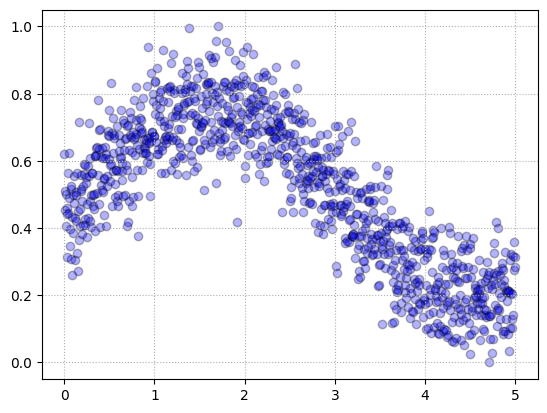

In [30]:
# Prepare dataset
N = 1000
X = np.linspace(0, 5, N)
y = X**2 + 100*np.sin(X) + np.random.randn(N) * 30.-100
y = (y - y.min()) / (y.max() - y.min())



# Train test split
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=.8)


# Visualize dataset
plt.scatter(X, y, color='blue', alpha=.3, edgecolor='k')
plt.grid(linestyle=':')

In [31]:
# Build Neural net
mdl = NormalSequential()
mdl.add('mu', Input(input_size=X.shape[1]))
mdl.add('mu', Dense(units=10, use_bias=True, activation='tanh'))
mdl.add('mu', Dense(units=1, use_bias=True, activation='linear'))

In [42]:
# Fit (using advi to make it faster)
mdl.fit(X_train, y_train, use_advi=True, advi_kws={'n': 100000}, sample_kws={'draws': 5000})

# Predict
y_pred = mdl.predict(X=X_test)
y_pred_quantile = mdl.predict(X=X_test, quantile=[.025, .975])

Finished [100%]: Average Loss = -612.06
Sampling: [likelihood]


Sampling: [likelihood]


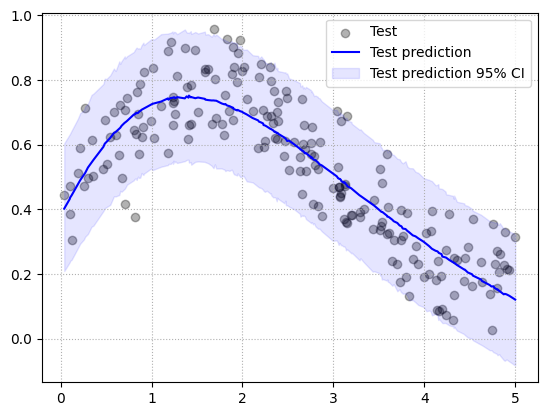

In [43]:
# Plot result
pred_df = pd.DataFrame({'x': X_test[:, 0], 'y1': y_pred_quantile[:, 0], 'y2': y_pred_quantile[:, 1], 'y': y_pred}).sort_values(by='x')
plt.scatter(X_test[:, 0], y_test, color='black', alpha=.3, label='Test')
plt.plot(pred_df['x'], pred_df['y'], color='blue', alpha=1, label='Test prediction')
plt.fill_between(pred_df['x'], pred_df['y1'], pred_df['y2'], color='blue', alpha=.1, label='Test prediction 95% CI')
plt.legend()
plt.grid(linestyle=':')

## Model diagnostic plots

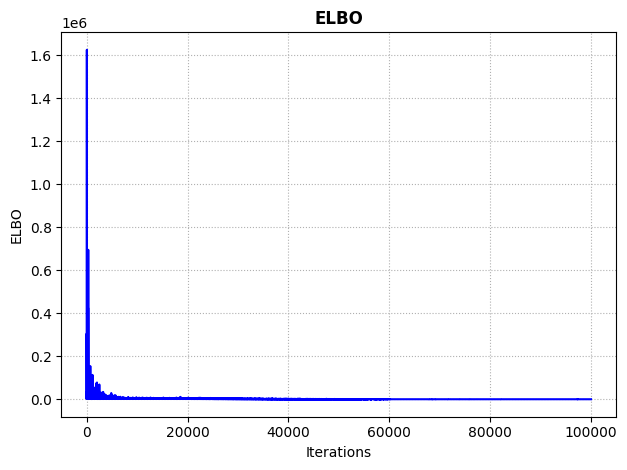

In [15]:
mdl.plot_ELBO()

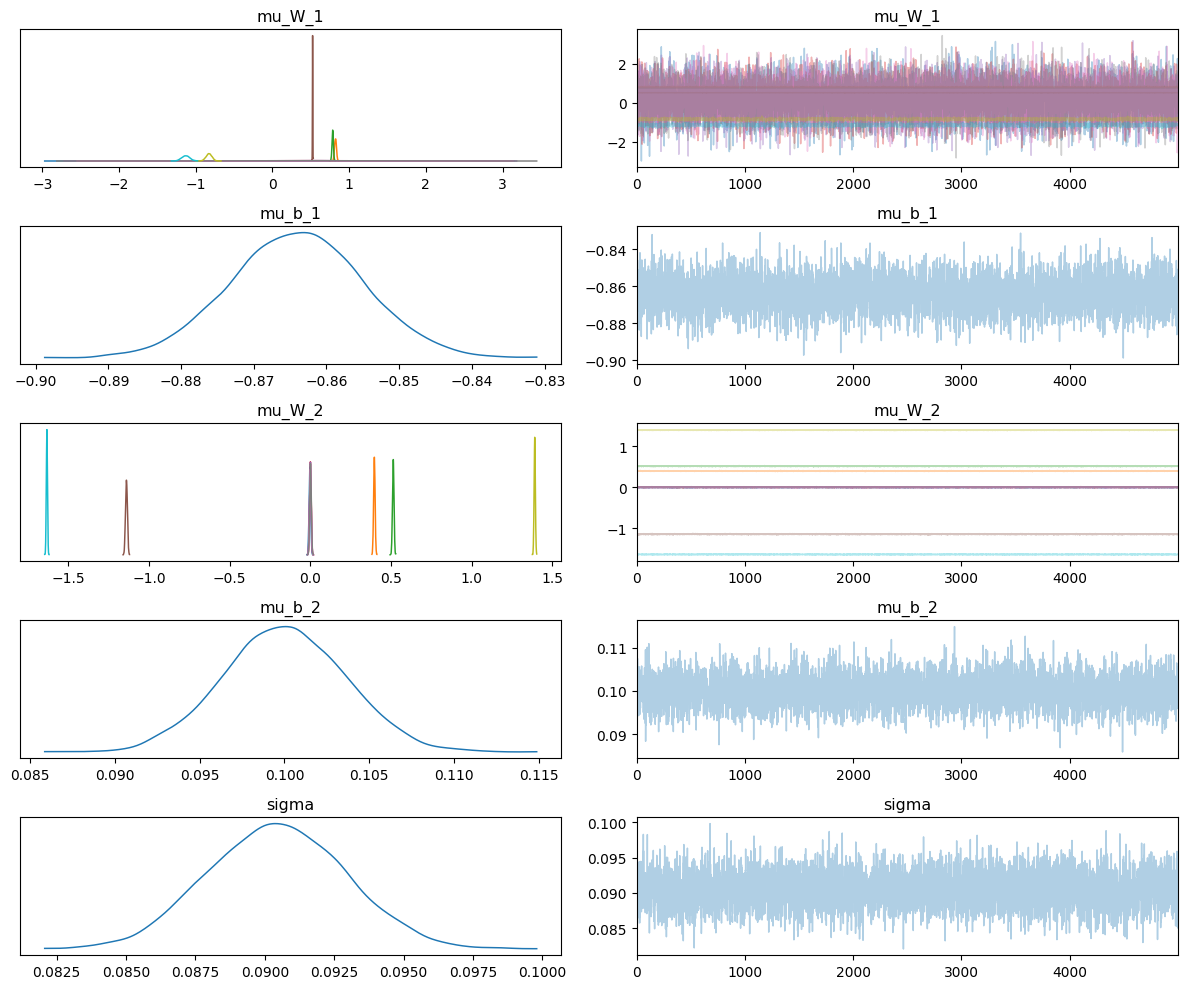

In [16]:
mdl.plot_trace()